In [1]:
import pandas as pd

def preprocess_data(df):
    # Check for missing values
    if df.isnull().values.any():
        # Calculate mean for numeric columns only
        numeric_cols = df.select_dtypes(include='number').columns
        df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
    
    # Change non-numeric values to numeric values
    df = df.apply(pd.to_numeric, errors='coerce')
    
    return df


df = pd.read_csv('values.csv')

# Preprocess the data
preprocessed_df = preprocess_data(df)
print (preprocessed_df)


         A(410)       B(435)       C(460)       D(485)       E(510)   F(535)  \
0   2429.580000  1108.990000  2091.930000   737.330000   835.140000  1376.82   
1   1707.900000   725.380000  1974.490000   670.810000   835.930000  1685.28   
2   1750.410000  1102.020000  2481.050000   816.800000   960.650000  1741.43   
3   2546.680000  1548.400000  2791.560000  1007.160000  1128.000000  1573.73   
4   3090.540000  1266.420000  2933.880000   940.610000  1109.840000  2047.64   
..          ...          ...          ...          ...          ...      ...   
95  2247.430000   833.990000  2195.430000   523.900000   786.990000  1074.36   
96  2374.070000   989.420000  2382.530000   567.000000   918.030000  1189.65   
97  2318.550000   821.030000  2096.900000   507.260000   781.470000  1070.61   
98  3289.170000  1234.540000  3234.430000   873.160000  1112.210000  1742.18   
99  2163.039798  1015.779354  2471.640101   744.820303   963.049697      NaN   

        G(560)      H(585)       R(610)

In [2]:

preprocessed_df.to_csv('preprocessed_data.csv', index=False)

PLSR
output:- how much of the nutrient is present in the soil based on the inputed wavelength


Random Forest Regressor Performance Metrics:
Mean Squared Error (MSE): 5105.2020
Mean Absolute Error (MAE): 21.6596
Root Mean Squared Error (RMSE): 71.4507
R² Score: -0.0597
P   (kg/ha): -113.97235620242317
K (kg/ha): -800.4810124446495
Ca (meq/100g): 65.06216362453306
Mg (meq/100g): -1.925262371347138
S (ppm): -7.772612871995463
Fe (ppm): 64.96634590923364
Mn (ppm): 22.98978296522602
Cu (ppm): 26.98369299309006
Zn (ppm): -2.8721640301102327
B (ppm): 1.0476596413730852


C:\Users\Ruchika Venkat\AppData\Local\Temp\ipykernel_21104\2087961908.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', len(nutrients)).colors


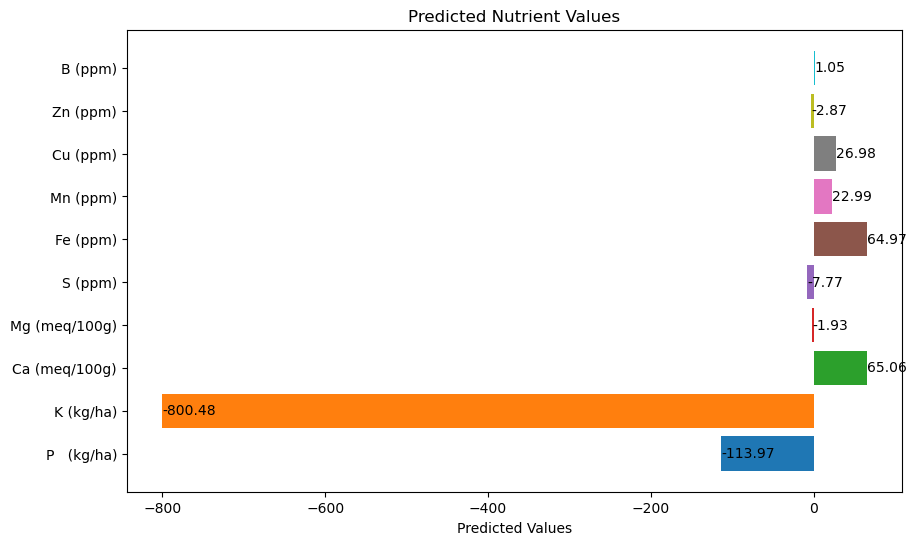

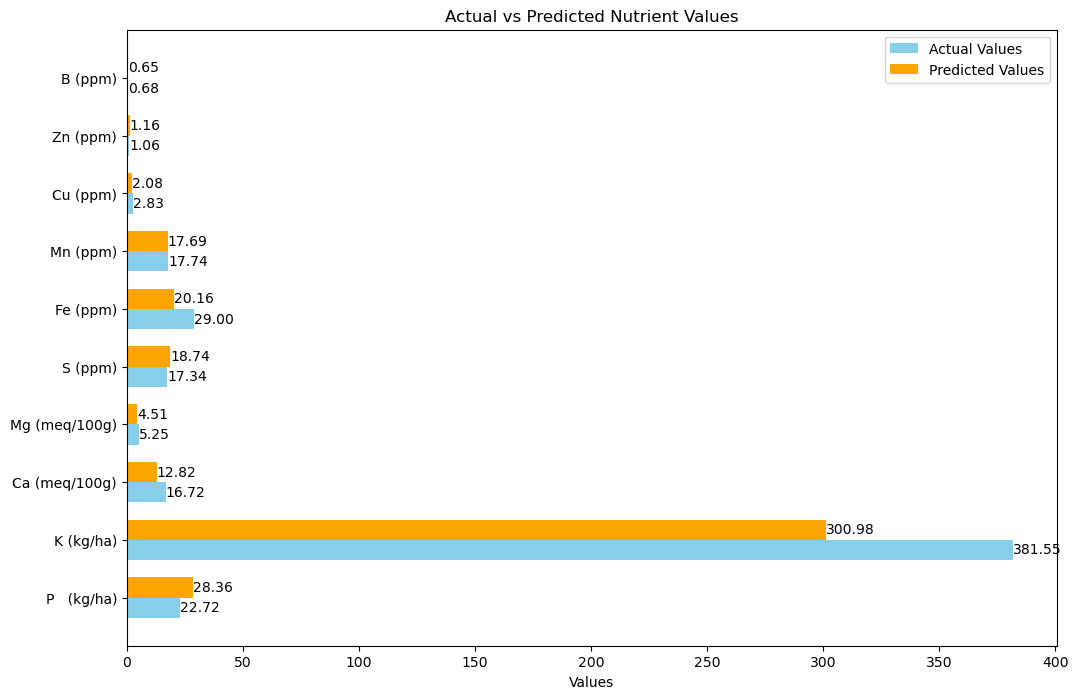

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def preprocess_data(df):
    # Check for missing values
    if df.isnull().values.any():
        # Calculate mean for numeric columns only
        numeric_cols = df.select_dtypes(include='number').columns
        df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
    
    # Change non-numeric values to numeric values
    df = df.apply(pd.to_numeric, errors='coerce')
    
    return df

df = pd.read_csv('preprocessed_data.csv')

# Preprocess the data
preprocessed_df = preprocess_data(df)


wavelengths = ['A(410)', 'B(435)', 'C(460)', 'D(485)', 'E(510)', 'F(535)', 'G(560)',
               'H(585)', 'R(610)', 'I(645)', 'S(680)', 'J(705)', 'U(760)',
               'V(810)', 'W(860)', 'K(900)', 'L(940)', 'T(730)']

nutrients = ['P   (kg/ha)', 'K (kg/ha)', 'Ca (meq/100g)', 'Mg (meq/100g)',
             'S (ppm)', 'Fe (ppm)', 'Mn (ppm)', 'Cu (ppm)', 'Zn (ppm)', 'B (ppm)']

# Separate into predictor variables (X) and target variables (y)
X = preprocessed_df[wavelengths]
y = preprocessed_df[nutrients]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the PLSR model
plsr = PLSRegression(n_components=2)
plsr.fit(X_train, y_train)

# Predict nutrients on the testing set
y_pred = plsr.predict(X_test)

# Calculate performance metrics
mse_rfr = mean_squared_error(y_test, y_pred)
mae_rfr = mean_absolute_error(y_test, y_pred)
rmse_rfr = np.sqrt(mse_rfr)
r2_rfr = r2_score(y_test, y_pred)

print("Random Forest Regressor Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse_rfr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rfr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rfr:.4f}")
print(f"R² Score: {r2_rfr:.4f}")

# Input wavelengths from the user
input_wavelengths = {}
for wavelength in wavelengths:
    value = float(input("Enter reflectance value for {}: ".format(wavelength)))
    input_wavelengths[wavelength] = [value]

# Create a DataFrame from the user input
input_wavelengths_df = pd.DataFrame(input_wavelengths)

# Preprocess the input wavelengths
input_wavelengths_df = preprocess_data(input_wavelengths_df)

# Predict nutrients using the input wavelengths
predicted_nutrients = plsr.predict(input_wavelengths_df)
for i, nutrient in enumerate(nutrients):
    print(nutrient + ":", predicted_nutrients[0][i])

    # Print the predictions with labels
# print("\nPLS Regression Prediction:")
# for nutrient, value in zip(nutrients, predicted_nutrients[0]):
#     print(f"{nutrient}: {value:.2f}")

# Plot predicted nutrient values
colors = cm.get_cmap('tab10', len(nutrients)).colors
plt.figure(figsize=(10, 6))
bars = plt.barh(nutrients, predicted_nutrients[0], color=colors)
plt.xlabel('Predicted Values')
plt.title('Predicted Nutrient Values')

# Adding values on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center')

plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(12, 8))
bar_width = 0.35
indices = np.arange(len(nutrients))

# Actual values
actual_means = y_test.mean(axis=0)
# Predicted values
predicted_means = y_pred.mean(axis=0)

# Plot actual values
actual_bars = plt.barh(indices - bar_width/2, actual_means, bar_width, label='Actual Values', color='skyblue')
# Plot predicted values
predicted_bars = plt.barh(indices + bar_width/2, predicted_means, bar_width, label='Predicted Values', color='orange')

# Adding nutrient labels
plt.yticks(indices, nutrients)
plt.xlabel('Values')
plt.title('Actual vs Predicted Nutrient Values')
plt.legend()

# Adding values on the bars
for actual_bar, predicted_bar in zip(actual_bars, predicted_bars):
    plt.text(actual_bar.get_width(), actual_bar.get_y() + actual_bar.get_height() / 2, f'{actual_bar.get_width():.2f}', va='center')
    plt.text(predicted_bar.get_width(), predicted_bar.get_y() + predicted_bar.get_height() / 2, f'{predicted_bar.get_width():.2f}', va='center')

plt.show()
